In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import lightgbm as lgbm
from sklearn.metrics import accuracy_score, recall_score , confusion_matrix, precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

In [62]:
PATH = '../../Downloads/titanic'
df = pd.read_csv(f"{PATH}/train.csv", dtype={'Pclass':'category','Sex':'category','Embarked':'category'})
df = df.sample(frac=1.0).reset_index(drop=True)

In [72]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [74]:
model = lgbm.LGBMClassifier()

In [75]:
model.fit(X_train, y_train)

LGBMClassifier()

In [76]:
predict_test = model.predict(X_test)

In [78]:
cmat = confusion_matrix(y_test,predict_test)
TN = cmat[0][0]
FP = cmat[0][1]
FN = cmat[1][0]
TP = cmat[1][1]

accuary = (TP+TN)/ (TP+FN+FP+TN)
recall = TP/(TP+FN)
precise = TP/(TP+FP)

accuary, recall, precise

(0.8475336322869955, 0.7375, 0.8194444444444444)

In [79]:
cmat

array([[130,  13],
       [ 21,  59]])

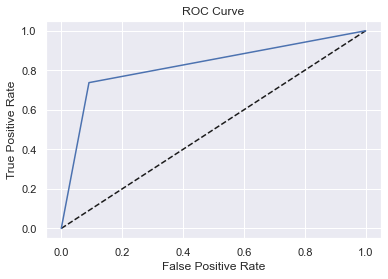

In [87]:
fpr, tpr, thresholds = roc_curve(y_test,predict_test)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Text(0.5, 0, 'Feature Importance')

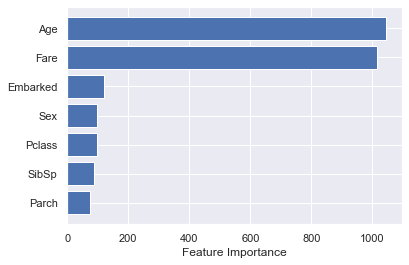

In [90]:
sorted_idx = model.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Feature Importance")